# Assignment 1

## B. Supervised Learning: Classification (4Points)
1. (0.5 points) Generate an artificial dataset for testing binary classification methods. It should have
two continuous independent attributes, one binary “class” attribute, and 40 data points in each
class. Plot it.

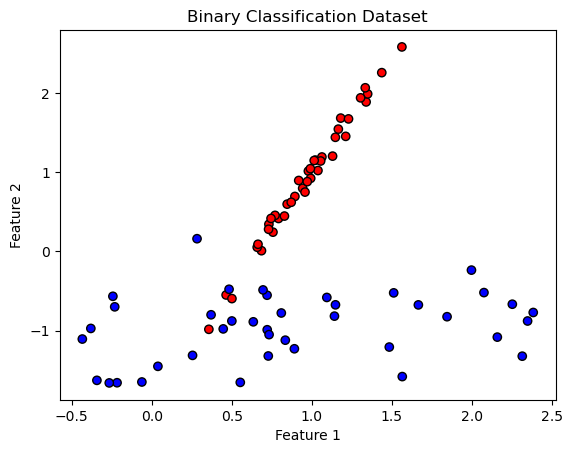

In [58]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=80, n_features=2, n_classes=2, n_clusters_per_class=1, n_informative=2, n_redundant=0, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title('Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


2. (0.5 points) Split your data into a training and a test set and add four outliers (two per class) to
the training set. Why would we need a test set? How do we choose its size?

In [61]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

outliersclass1 = np.array([[6, 6], [7, 7]])  
outliersclass2 = np.array([[-6, -6], [-7, -7]]) 

X_train = np.vstack([X_train, outliersclass1, outliersclass2])
y_train = np.hstack([y_train, [0, 0, 1, 1]])

The test set helps us to evaluate the model´s performance on the not descoverable data and we choose its size which is based on the total sample size, training of the balance and testing data needs

3. Use scikit-learn to train the following classification models:
    * k-nearest neighbors
    * naive Bayes
    * a decision tree
    * a random forest

    In each case, report training accuracy, test accuracy, and confucsion matrices on test data.

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    
    print(f"{name}:\nTraining Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")
    print(f"Confusion Matrix on Test Data:\n{conf_matrix}\n")


K-Nearest Neighbors:
Training Accuracy: 0.89, Test Accuracy: 0.95
Confusion Matrix on Test Data:
[[10  0]
 [ 1  9]]

Naive Bayes:
Training Accuracy: 0.77, Test Accuracy: 0.70
Confusion Matrix on Test Data:
[[7 3]
 [3 7]]

Decision Tree:
Training Accuracy: 1.00, Test Accuracy: 0.95
Confusion Matrix on Test Data:
[[10  0]
 [ 1  9]]

Random Forest:
Training Accuracy: 1.00, Test Accuracy: 0.95
Confusion Matrix on Test Data:
[[10  0]
 [ 1  9]]



4. (1 point) Graph the decision boundaries produced by each model. (See https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html.)

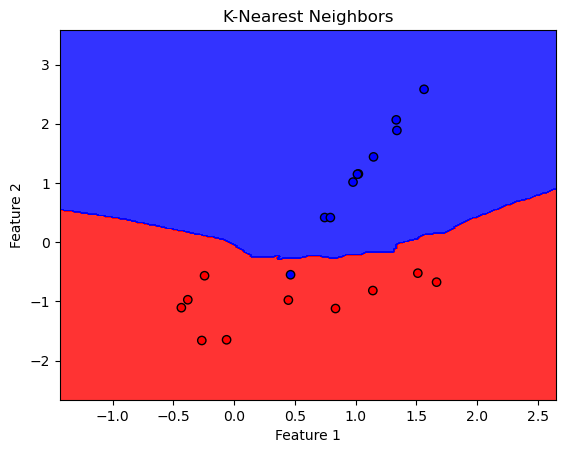

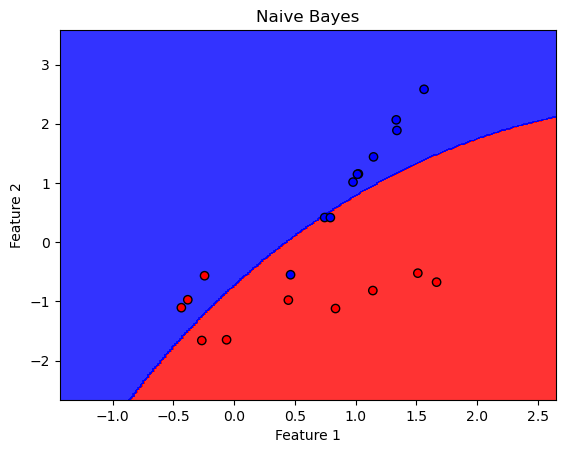

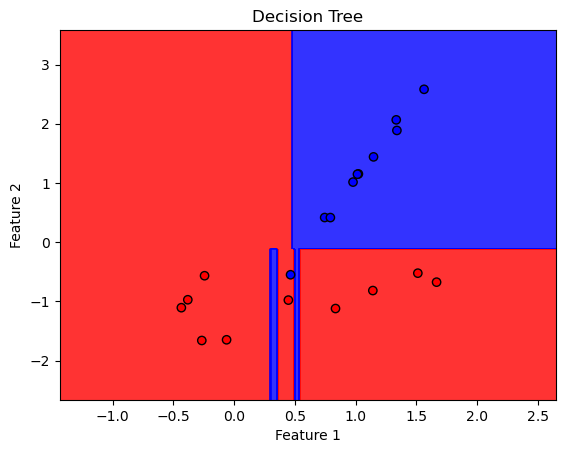

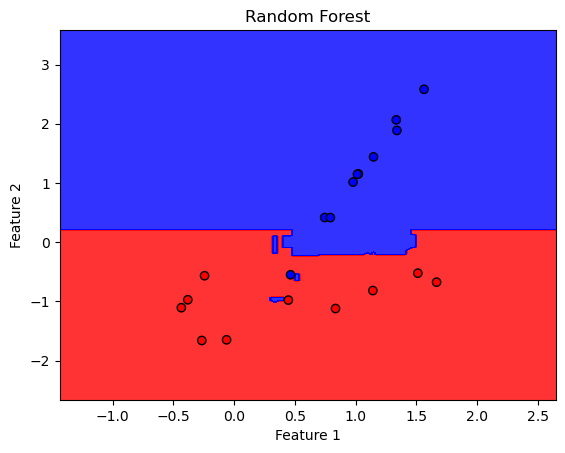

In [63]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(('red', 'blue')))
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

for name, model in models.items():
    plot_decision_boundary(model, X_test, y_test, name)


5. (1 point) What model performed the best? Describe a different classification problem where one
of the alternatives would have been better.



Random Forests performed the best. An alternative classification problem would be if the dataset was more linear and less complex then a naive bayses classifier would perform better.

## C. Unsupervised Learning (8Points)
### C.I. k-means Clustering (4.5 points)

1) (0.5 points) Study k-means and briefly describe how this model is trained. (Aim for 3 sentences.)

k-means aims to minimize the distance from each point to its cluster centroid. It starts by initializing cluster centers and assigns points to the nearest center, next it recalculates the centroids. This process repeats until reaching a set number of iterations or one has a stable cluster result.

2) (0.5 points) Use scikit-learn to run k-means on the dataset in iris.csv. Produce scatter plots of
each pair of attributes, colored by the k-means clusters. (You can use seaborn.pairplot.)

In [41]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


c:\Users\David\miniconda3\envs\iml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


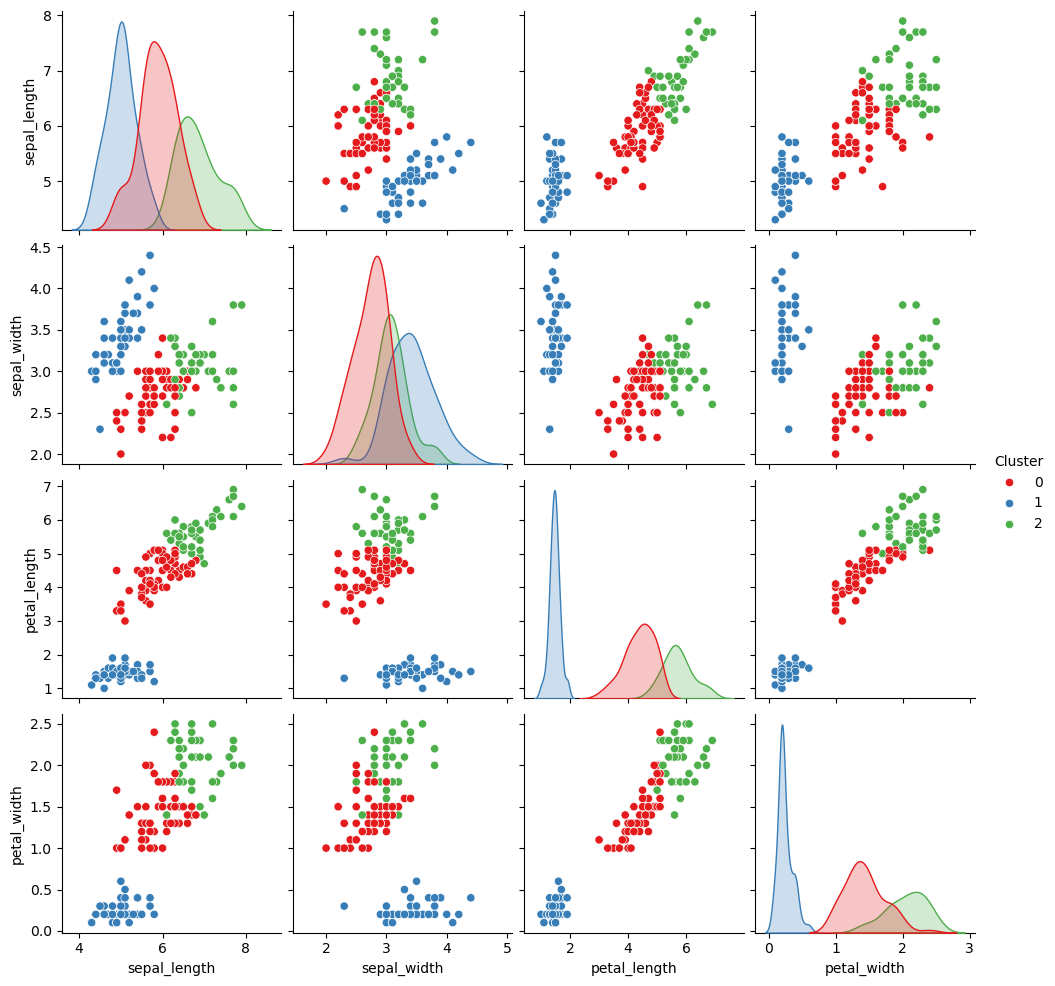

In [42]:
# Import iris.csv
iris_df = pd.read_csv('iris.csv')

# Check if the dataset is correctly loaded
print(iris_df.head())

# n_clusters = 3, since there are 3 species in iris.csv
kmeans = KMeans(n_clusters = 3, random_state = 0)

# Fit kmeans to the dataset
kmeans.fit(iris_df.iloc[:,:-1])

# Add cluster labels
iris_df['Cluster'] = kmeans.labels_

# Scatter for each pair of attributes
sns.pairplot(iris_df, hue='Cluster', palette = 'Set1')
plt.show()


3) (0.5 points) Compute the average silhouette score for each cluster. Explain what this measures.

In [43]:
score = silhouette_score(iris_df.iloc[:, :-2], iris_df['Cluster'])  
print(f'Average Silhouette Score: {score}')


Average Silhouette Score: 0.5509643746707441


4) (1.0 point) Compare the clusters inferred by k-means with the data labels using a confusion matrix.
Did k-means accurately distinguish the three species?

In [44]:
# True labels are in the species column of iris.csv
true_labels = iris_df['species']
predicted_lb = iris_df['Cluster']

species = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
pred_lb = predicted_lb.map(species)

matrix = confusion_matrix(true_labels, pred_lb)
print(f'Confusion Matrix: \n{matrix}')

Confusion Matrix: 
[[ 0 50  0]
 [47  0  3]
 [14  0 36]]


#### Did k-means accurately distinguish the three species?

Each row represents a species, and the columns represent the clusters:

First row Setosa: all the samples are in one groupe, the second cluster

Second row Versicolor: 47 samples in first cluster, 3 samples in third cluster

Third row Virginica: 14 samples in first cluster, 36 samples in third cluster

k-means distinguished Setosa very well, but Versicolor and Virginica not so good, since they have some overlapping clusters.

5) (1.0 point) unknown species.csv contains data on 6 flowers of unknown species. Use your trained
k-means model to predict which cluster these new flowers belong to.

In [45]:
col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
unknown_species_df = pd.read_csv('unknown_species.csv')

predictions = kmeans.predict(unknown_species_df[col])

# 0 Setosa, 1 Versicolor, 2 Virginica
print(predictions)

[1 0 1 2 2 0]


6) (1.0 point) Implement k-means from scratch and test your implementation on the iris dataset.

In [57]:
iris_data = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values.astype(float)
k = 3

np.random.seed(3)
init_centroids = iris_data[np.random.choice(iris_data.shape[0],k, replace=False)]

def assign_clusters(data,centroids):
    distances = np.linalg.norm(data[:,np.newaxis] - centroids, axis= 2)
    return np.argmin(distances, axis= 1)

def update_centroids(data, labels, k):
    return np.array([data[labels == i].mean(axis=0) for i in range(k)])

centroids = init_centroids
for i in range(100):    
    labels = assign_clusters(iris_data, centroids)
    new_centroids = update_centroids(iris_data, labels, k)

    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids

print("Final centroids:\n", centroids)
print("Cluster labels:\n", labels)


Final centroids:
 [[5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]]
Cluster labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


### C.II. DBScan and PCA (3.5 points)

1. (0.5 points) Study DBScan and briefly describe how this algorithm works. (Aim for three sentences.)

Density-Based Spatial Clustering of Applicaations with Noise (DBScan) is a clustering algorithm that groups together points that are closely packed. The points are grouped based on distance to other points, that are within a given radius and a minimum amount of points. DBScan does not require specifiying the number of clusters in advance unlike k-means, but in the other hand it may struggle with varying densities inside the datasets.

2. (0.5 points) Read the dataset in ulu.csv and apply scikit-learn’s implementation of DBScan to
infer clusters. (Keep parameters at their defaults.) How many clusters did you get?

In [47]:
ulu_df = pd.read_csv('ulu.csv')

dbscan = DBSCAN()
labels = dbscan.fit_predict(ulu_df)

clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of cluster: {clusters}')

Number of cluster: 8


3. (0.5 points) Plot some projections of the data into two dimensions. Color using the clusters inferred
by DBScan. What shapes do you recognize?

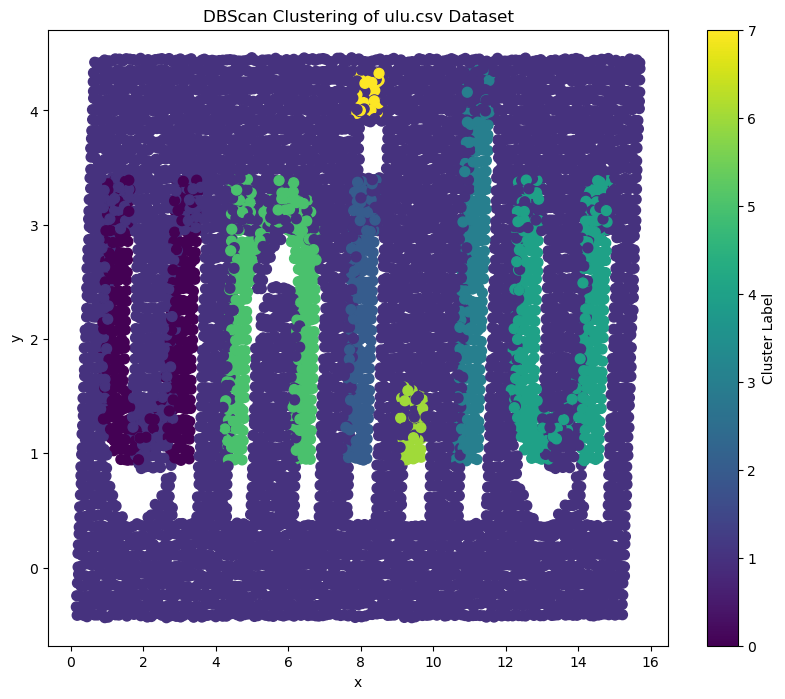

In [48]:
f1 = 'x'
f2 = 'y'

plt.figure(figsize=(10,8))
plt.scatter(ulu_df[f1], ulu_df[f2], c = labels, cmap = 'viridis', s = 50)
plt.colorbar(label='Cluster Label')
plt.xlabel(f1)
plt.ylabel(f2)
plt.title('DBScan Clustering of ulu.csv Dataset')
plt.show()

On the plot one can see the following letters written: u n i . l u

4. (1 point) Use PCA to find a two-dimensional projection of maximum variance and plot the data
under this projection. Informally describe what this transformation does. For 3-dimensional data,
what does it do geometrically?

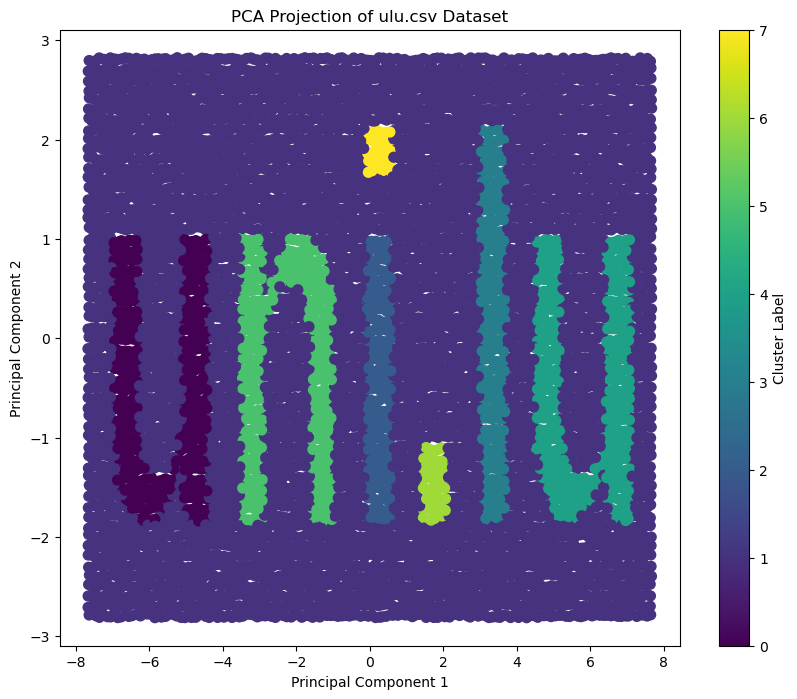

In [49]:
pca = PCA(n_components = 2)
ulu_pca = pca.fit_transform(ulu_df)

plt.figure(figsize=(10, 8))
plt.scatter(ulu_pca[:, 0], ulu_pca[:, 1], c = labels, cmap = 'viridis', s = 50)
plt.colorbar(label='Cluster Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of ulu.csv Dataset')
plt.show()

If one compares the PCA plot with the previous plot, one can see that the points are clearer and are placed more accurately. More technically one can say that the maximum variance aligns with the clusters since the vertical points are well separated and alligned. One can see that the previous white spaces are not filled in and the general amount of white spaces is a lot smaller. 

In 3D each feature represents one direction of maximum variance, and the first feature is perpendicular to the second feature and the third feature is perpendicular to the plane of the first-second features.

5. (0.5 points) Now run k-means instead of DBScan. Compare their silhouette scores.


In [51]:
dbscan_silhouette = silhouette_score(ulu_df, labels, metric = 'euclidean')

kmeans = KMeans(n_clusters= clusters, random_state=0)
kmeans_labels = kmeans.fit_predict(ulu_df)

kmeans_silhouette = silhouette_score(ulu_df, kmeans_labels, metric= 'euclidean')

print(f'DBSCAN Silhouette: {dbscan_silhouette}')
print(f'KMEANS Silhouette: {kmeans_silhouette}')


DBSCAN Silhouette: -0.40388367317548474
KMEANS Silhouette: 0.35760593524687645


DBSCAN has a very bad silhouette score, where a negative score indicates that the points are not accurate and far from their clusters. Meanwhile, k-means has a rather good score , thus for the ulu.csv dataset Kmeans performed better.

6. (0.5 points) Would silhouette scores be a good cost function to learn the interpretable clusters in
this data?

Silhouette scores can be useful for evaluating clustering quality, but they may not be the best cost function for learning interpretable clusters. While they indicate how well-separeted and compact clusters are, they are sensitive to noise and may favor larger clusters, potentially overlooking smaller, meaningful groupings. It's often better to use silhouette scores alongside other metrics and visualizations for more comprehensive assessement.